In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from extraction import findSVOs
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [3]:
def create_graph(final_nodes):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = final_nodes[i][0]
        ent2 = final_nodes[i][2]
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize = (size, size))
        edge_labels = dict([((u, v, ), edge[d['weight']]) for u, v, d in G.edges(data = True)])
        pos = nx.spring_layout(G, k = 0.8)
        nx.draw(G, with_labels = True, node_color = 'lightblue', node_size=5000, edge_color='r', edge_cmap = plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 15)
        return G, edge_labels

In [4]:
def load_text(file_name):
    with open(file_name, 'r') as file:
        text = file.read()
    sentences = sent_tokenize(text)
    return sentences

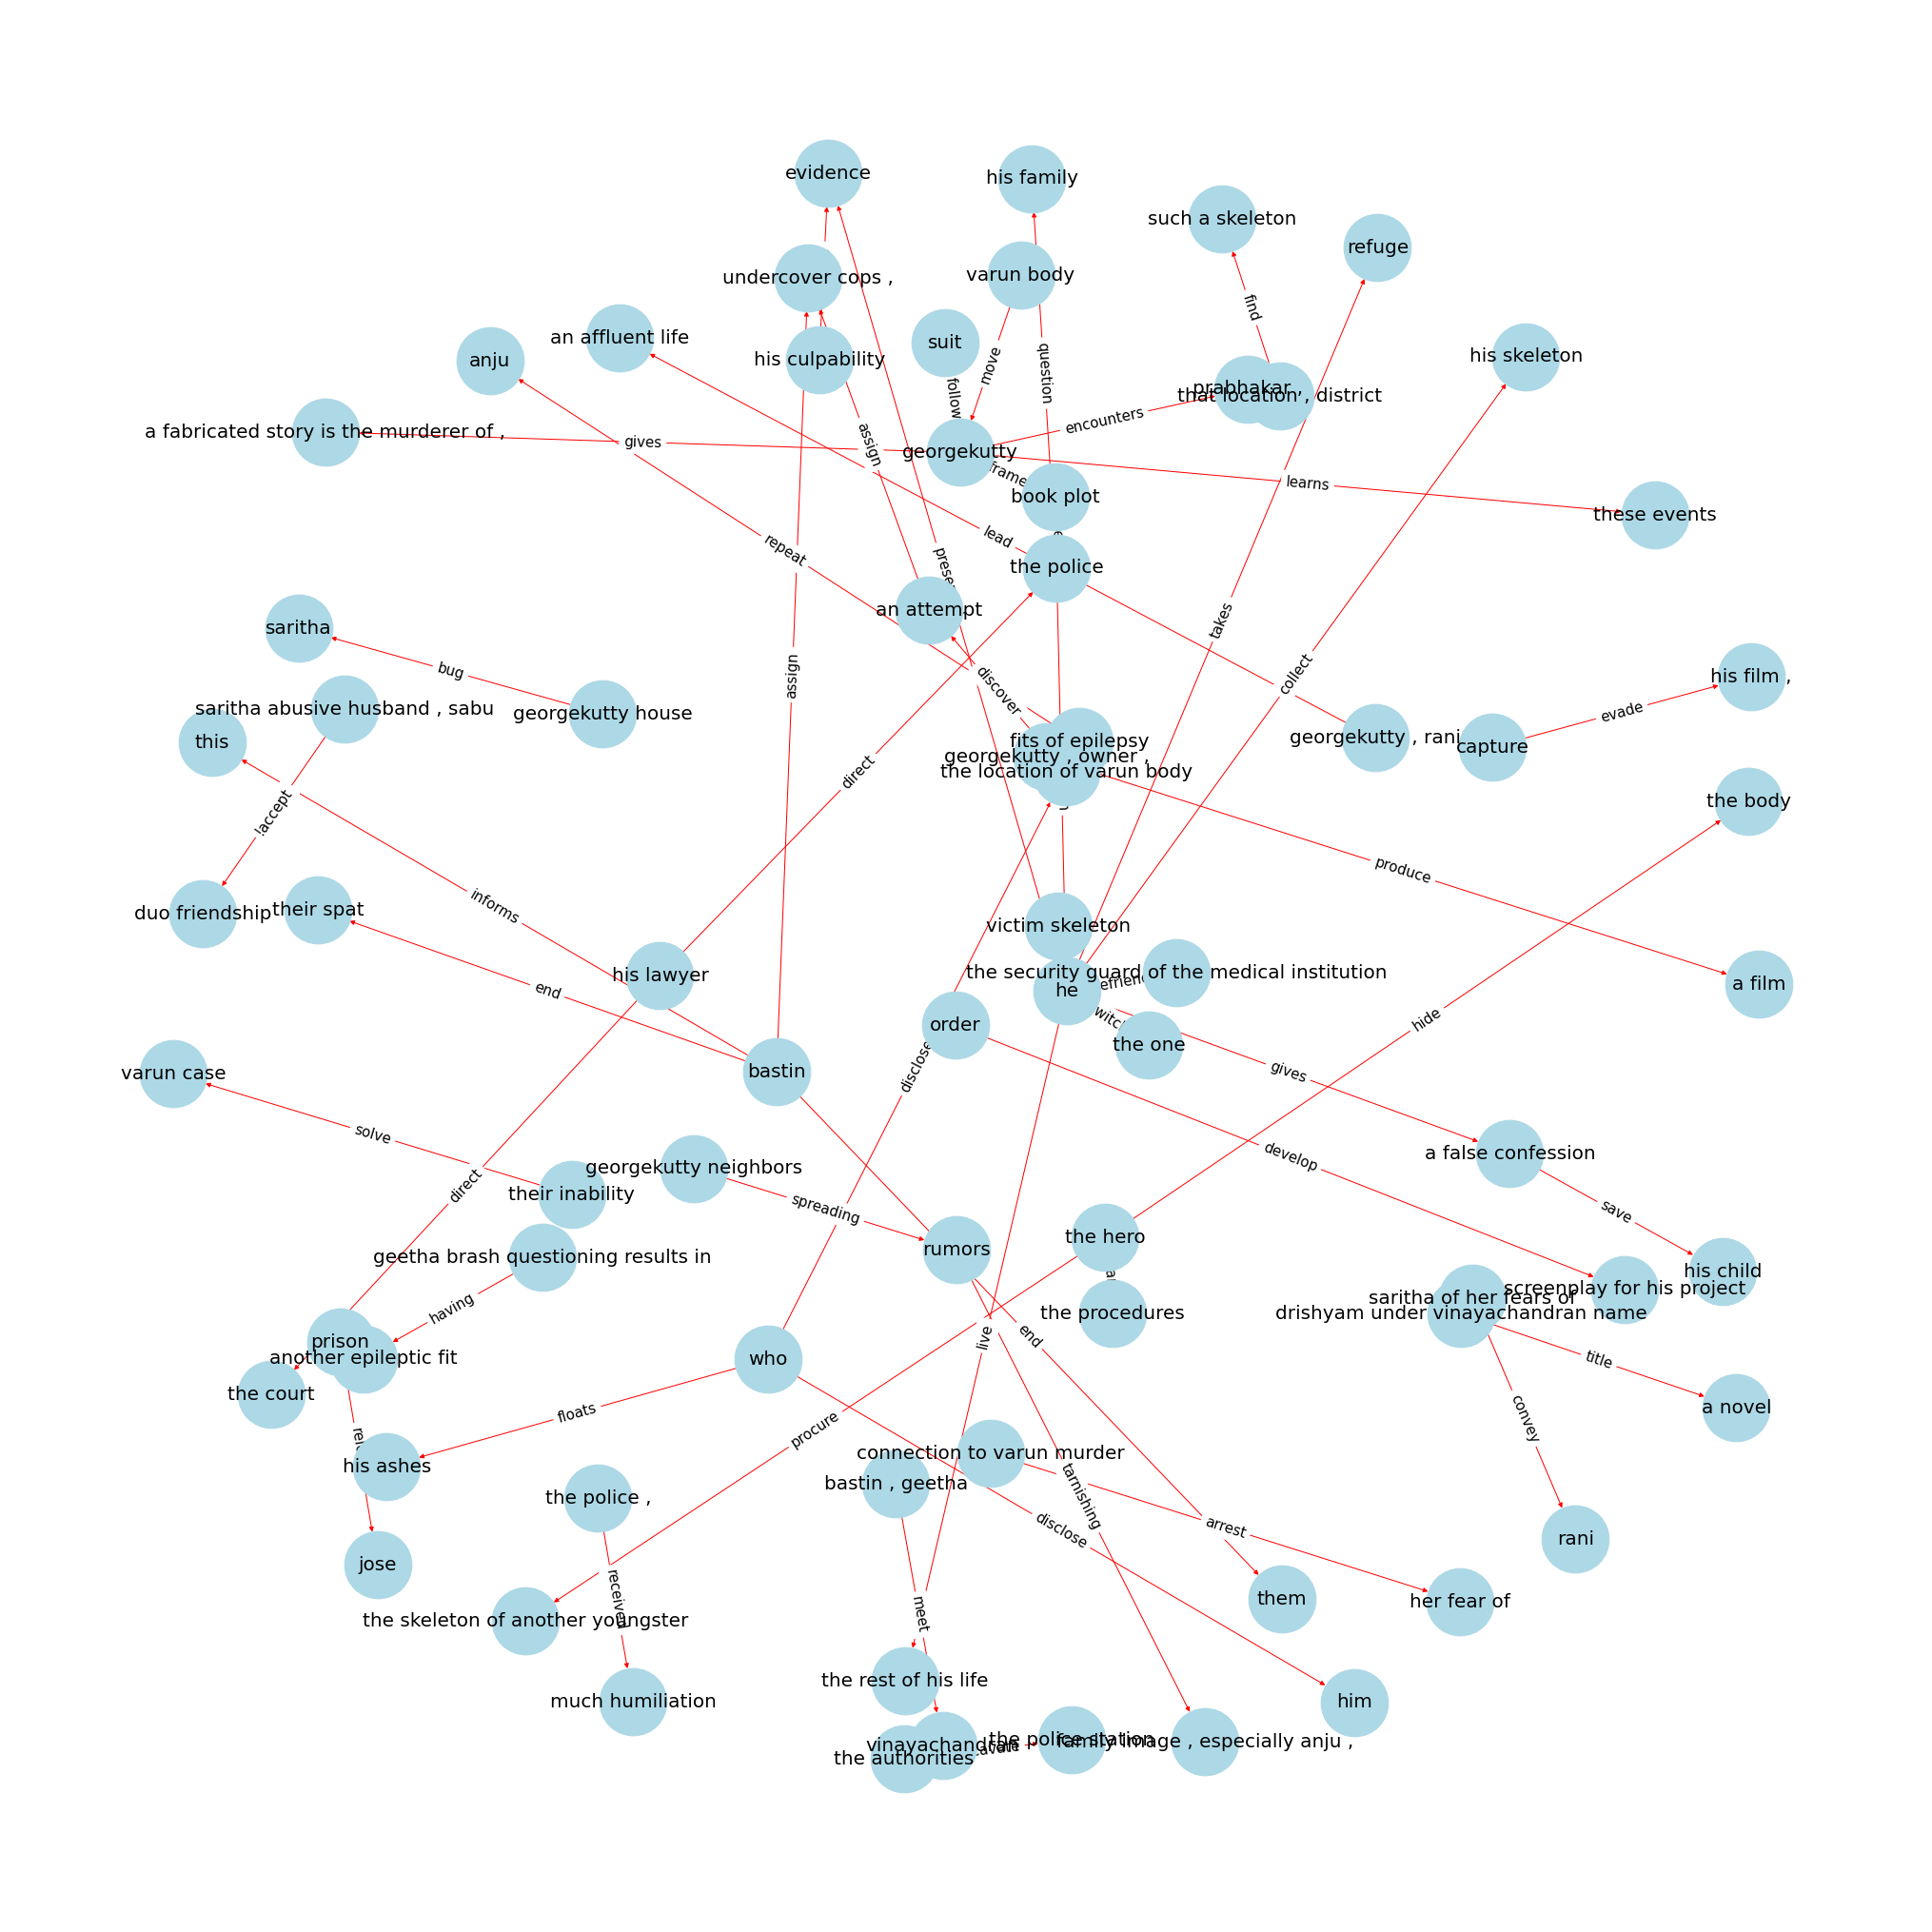

In [10]:
file_name = 'text1'

sentences = load_text('../data/test/' + file_name + '.txt')

nodes = []
final_nodes = []

for sentence in sentences: 
    tokens = nlp(sentence)
    svos = findSVOs(tokens)
    nodes.append(svos)
    
for i in nodes:
    for j in i:
        if(len(j) == 3):
            final_nodes.append(j)
                
g = create_graph(final_nodes)
plt.savefig('../data/test/images/' + file_name + '-graph.png')

In [7]:
d = pd.read_csv('table1.csv')
d.head()

FileNotFoundError: [Errno 2] No such file or directory: 'table1.csv'